<a href="https://colab.research.google.com/github/santiagonajera/Forecast-ai/blob/main/VentasConAI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


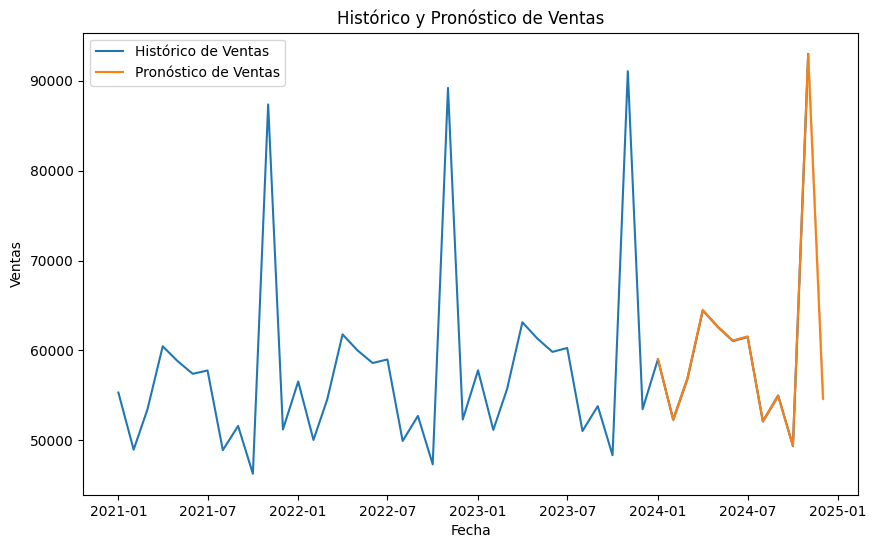

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Cargar los datos desde el archivo Excel
url = 'https://github.com/santiagonajera/Forecast-ai/raw/refs/heads/main/Forecast-ai.xlsx'
data = pd.read_excel(url, header=None)

# Renombrar las columnas para facilitar el manejo
data.columns = ['Mes', 'Ventas']

# Convertir la columna 'Mes' a formato datetime
data['Fecha'] = pd.to_datetime(data['Mes'], format='%b-%y')

# Establecer la columna 'Fecha' como índice
data.set_index('Fecha', inplace=True)

# Ordenar los datos por fecha
data = data.sort_index()

# Preparar los datos para el modelo SARIMA
data = data.asfreq('MS')  # Convertir a frecuencia mensual

# Dividir los datos en conjunto de entrenamiento y conjunto de prueba
train_data = data[:'2023-12']
test_data = data['2024-01':]

# Ajustar el modelo SARIMA
model = SARIMAX(train_data['Ventas'], order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
results = model.fit(disp=False)

# Realizar el pronóstico para los próximos 12 meses
forecast = results.get_forecast(steps=12)
forecast_ci = forecast.conf_int()

# Generar el gráfico
plt.figure(figsize=(10, 6))
plt.plot(data.index, data['Ventas'], label='Histórico de Ventas')
plt.plot(forecast.predicted_mean.index, forecast.predicted_mean, label='Pronóstico de Ventas')
plt.fill_between(forecast_ci.index, forecast_ci.iloc[:, 0], forecast_ci.iloc[:, 1], color='k', alpha=.2)
plt.xlabel('Fecha')
plt.ylabel('Ventas')
plt.title('Histórico y Pronóstico de Ventas')
plt.legend()
plt.show()


In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Cargar el archivo Excel desde el enlace
url = "https://github.com/santiagonajera/Forecast-ai/raw/refs/heads/main/Forecast-ai.xlsx"
df = pd.read_excel(url, parse_dates=['A'], index_col='A')

# Renombrar las columnas para facilitar el manejo
df.columns = ['Sales']

# Asegurarse de que el índice sea de tipo datetime
df.index = pd.to_datetime(df.index)

# Ajustar el modelo de suavizado exponencial (Holt-Winters)
model = ExponentialSmoothing(df['Sales'], trend='add', seasonal='add', seasonal_periods=12)
model_fit = model.fit()

# Realizar el forecast para los próximos 12 meses
forecast = model_fit.forecast(12)

# Crear un DataFrame con los resultados del forecast
forecast_df = pd.DataFrame(forecast, columns=['Forecast'], index=pd.date_range(start=df.index[-1] + pd.DateOffset(months=1), periods=12, freq='MS'))

# Concatenar los datos históricos con el forecast
combined_df = pd.concat([df, forecast_df])

# Graficar los datos históricos y el forecast
plt.figure(figsize=(14, 7))
plt.plot(df.index, df['Sales'], label='Históricos', color='blue')
plt.plot(forecast_df.index, forecast_df['Forecast'], label='Forecast', color='red')
plt.title('Ventas Históricas y Proyección de Ventas')
plt.xlabel('Fecha')
plt.ylabel('Ventas')
plt.legend()
plt.grid(True)
plt.show()

ValueError: Missing column provided to 'parse_dates': 'A' (sheet: 0)

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Cargar el archivo Excel desde el enlace
url = "https://github.com/santiagonajera/Forecast-ai/raw/refs/heads/main/Forecast-ai.xlsx"
df = pd.read_excel(url, sheet_name='Hoja1', parse_dates=['A'], index_col='A')

# Renombrar las columnas para facilitar el manejo
df.columns = ['Sales']

# Asegurarse de que el índice sea de tipo datetime
df.index = pd.to_datetime(df.index)

# Ajustar el modelo de suavizado exponencial (Holt-Winters)
model = ExponentialSmoothing(df['Sales'], trend='add', seasonal='add', seasonal_periods=12)
model_fit = model.fit()

# Realizar el forecast para los próximos 12 meses
forecast = model_fit.forecast(12)

# Crear un DataFrame con los resultados del forecast
forecast_df = pd.DataFrame(forecast, columns=['Forecast'], index=pd.date_range(start=df.index[-1] + pd.DateOffset(months=1), periods=12, freq='MS'))

# Concatenar los datos históricos con el forecast
combined_df = pd.concat([df, forecast_df])

# Graficar los datos históricos y el forecast
plt.figure(figsize=(14, 7))
plt.plot(df.index, df['Sales'], label='Históricos', color='blue')
plt.plot(forecast_df.index, forecast_df['Forecast'], label='Forecast', color='red')
plt.title('Ventas Históricas y Proyección de Ventas')
plt.xlabel('Fecha')
plt.ylabel('Ventas')
plt.legend()
plt.grid(True)
plt.show()

ValueError: Missing column provided to 'parse_dates': 'A' (sheet: Hoja1)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


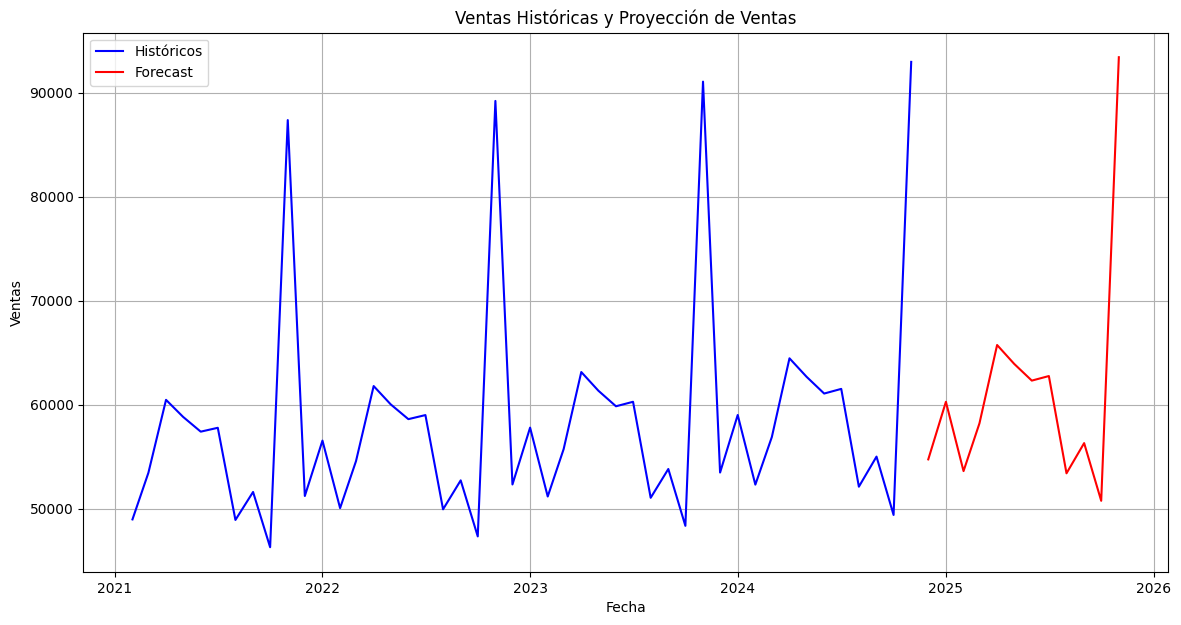

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Cargar el archivo Excel desde el enlace
url = "https://github.com/santiagonajera/Forecast-ai/raw/refs/heads/main/Forecast-ai.xlsx"
df = pd.read_excel(url, sheet_name='Hoja1', parse_dates=[0], index_col=0)

# Renombrar las columnas para facilitar el manejo
df.columns = ['Sales']

# Asegurarse de que el índice sea de tipo datetime
df.index = pd.to_datetime(df.index)

# Ajustar el modelo de suavizado exponencial (Holt-Winters)
model = ExponentialSmoothing(df['Sales'], trend='add', seasonal='add', seasonal_periods=12)
model_fit = model.fit()

# Realizar el forecast para los próximos 12 meses
forecast = model_fit.forecast(12)

# Crear un DataFrame con los resultados del forecast
forecast_df = pd.DataFrame(forecast, columns=['Forecast'], index=pd.date_range(start=df.index[-1] + pd.DateOffset(months=1), periods=12, freq='MS'))

# Concatenar los datos históricos con el forecast
combined_df = pd.concat([df, forecast_df])

# Graficar los datos históricos y el forecast
plt.figure(figsize=(14, 7))
plt.plot(df.index, df['Sales'], label='Históricos', color='blue')
plt.plot(forecast_df.index, forecast_df['Forecast'], label='Forecast', color='red')
plt.title('Ventas Históricas y Proyección de Ventas')
plt.xlabel('Fecha')
plt.ylabel('Ventas')
plt.legend()
plt.grid(True)
plt.show()